# Decision Tree

- Here I suppose to develope a decision tree model from 0
- Moreover, you are gonna learn lots of things

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

## 1) Reading CSV

- turn your database to a pandas datframe

In [2]:
Data = pd.read_csv ("COVID.csv")
Data.head ()
print (Data.shape)

(9134, 330)


C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_7668\3451266395.py:1: DtypeWarning: Columns (5,9,12,13,14,18,19,20,24,25,32,33,36,37,41,44,45,48,49,50,52,53,54,56,57,58,59,61,63,64,65,69,74,76,78,79,81,83,84,85,86,87,88,90,93,94,95,96,97,98,99,100,102,103,104,105,106,107,108,109,110,113,114,116,117,119,120,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,153,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,193,194,195,196,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,279,280,281,282,283,284,285,287,288,289,290,291,292,293,295,296,297,298,299,300,301,305,306,307,308,310,311,31

## 2) making database smaller

- we don't need all of the items, let's make it smaller

In [3]:
list_of_variables = ["Patient_Hospital", "Demographic_Age", "Demographic_Gender","Symptom_Caugh", "Symptom_Dyspnea", "Symptom_Fever","Symptom_LOC", "Outcome_InhospitalMortality"]
cdf = Data[list_of_variables]
print (cdf.shape)
cdf.head ()


(9134, 8)


,Patient_Hospital,Demographic_Age,Demographic_Gender,Symptom_Caugh,Symptom_Dyspnea,Symptom_Fever,Symptom_LOC,Outcome_InhospitalMortality
0,Hospital1,33.0,Male,1,1,0,0.0,Died
1,Hospital1,44.0,Male,1,1,0,0.0,Died
2,Hospital1,50.0,Male,0,1,0,0.0,Died
3,Hospital1,71.0,Male,0,1,1,0.0,Survived
4,Hospital1,71.0,Male,0,1,1,0.0,Survived


## 3) Let's clean and label dataframe

- first we need to clean all values
- then, we need to label the categorical variables

(I'm trying to educate myself here, I already knew that I can mix both steps together. I just want you to see there are many ways to reach God (jk!) )

### example 1: Age

- 1: see what is going on
- 2: clean based on previous results
- 3: categorize the variable

(for age I just removed all of the missing values mainly because I haven't learnt multivariable imputaion yet :)

In [4]:
cdf ["Demographic_Gender"].value_counts ()

Male      4942
Female    4132
1           35
2           24
0            1
Name: Demographic_Gender, dtype: int64

In [5]:
sex_map = {"1":"Male" , "2":"Female" , "0" : np.nan}
cdf ["Demographic_Gender"] = cdf ["Demographic_Gender"].replace(sex_map)
cdf ["Demographic_Gender"].value_counts ()
cdf.dropna(subset=["Demographic_Gender"], inplace=True)

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_7668\1538505695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf ["Demographic_Gender"] = cdf ["Demographic_Gender"].replace(sex_map)
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_7668\1538505695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(subset=["Demographic_Gender"], inplace=True)


In [6]:
from sklearn import preprocessing
Cat_sex = preprocessing.LabelEncoder()
Cat_sex.fit (["Male", "Female"])
cdf ["Demographic_Gender"] = Cat_sex.transform (cdf ["Demographic_Gender"])
cdf ["Demographic_Gender"].value_counts ()

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_7668\1779258275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf ["Demographic_Gender"] = Cat_sex.transform (cdf ["Demographic_Gender"])


1    4977
0    4156
Name: Demographic_Gender, dtype: int64

### example 2 : Hospital

- let's do it all at the same time with my older and easier way

In [7]:
cdf ["Patient_Hospital"].value_counts ()

Hospital1    4783
Hospital3    1749
Hospital2    1429
Hospital4    1172
Name: Patient_Hospital, dtype: int64

In [8]:
cdf.dropna(subset= ["Patient_Hospital"], inplace=True)
cdf ["Patient_Hospital"] = pd.factorize( cdf ["Patient_Hospital"])[0]
cdf.head ()

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_7668\3754167424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(subset= ["Patient_Hospital"], inplace=True)
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_7668\3754167424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf ["Patient_Hospital"] = pd.factorize( cdf ["Patient_Hospital"])[0]


,Patient_Hospital,Demographic_Age,Demographic_Gender,Symptom_Caugh,Symptom_Dyspnea,Symptom_Fever,Symptom_LOC,Outcome_InhospitalMortality
0,0,33.0,1,1,1,0,0.0,Died
1,0,44.0,1,1,1,0,0.0,Died
2,0,50.0,1,0,1,0,0.0,Died
3,0,71.0,1,0,1,1,0.0,Survived
4,0,71.0,1,0,1,1,0.0,Survived


### example 3: Let's mix the methods

In [9]:
cdf ["Outcome_InhospitalMortality"].value_counts ()

Survived    7238
Died        1816
Unknown       79
Name: Outcome_InhospitalMortality, dtype: int64

In [10]:
mapping = {'Died': 1, 'Survived': 0, 'Unknown': np.nan}
cdf ["Outcome_InhospitalMortality"] = cdf ["Outcome_InhospitalMortality"].replace(mapping)

# missing values removing

cdf.dropna(subset=["Outcome_InhospitalMortality"], inplace=True)

cdf.head ()

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_7668\2305780782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf ["Outcome_InhospitalMortality"] = cdf ["Outcome_InhospitalMortality"].replace(mapping)
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_7668\2305780782.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(subset=["Outcome_InhospitalMortality"], inplace=True)


,Patient_Hospital,Demographic_Age,Demographic_Gender,Symptom_Caugh,Symptom_Dyspnea,Symptom_Fever,Symptom_LOC,Outcome_InhospitalMortality
0,0,33.0,1,1,1,0,0.0,1.0
1,0,44.0,1,1,1,0,0.0,1.0
2,0,50.0,1,0,1,0,0.0,1.0
3,0,71.0,1,0,1,1,0.0,0.0
4,0,71.0,1,0,1,1,0.0,0.0


In [11]:
cdf.dropna(subset=["Demographic_Age"], inplace=True)
cdf.dropna(subset=["Symptom_Caugh"], inplace=True)
cdf.dropna(subset=["Symptom_Fever"], inplace=True)
cdf.dropna(subset=["Symptom_LOC"], inplace=True)

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_7668\3379078044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(subset=["Demographic_Age"], inplace=True)
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_7668\3379078044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(subset=["Symptom_Caugh"], inplace=True)
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_7668\3379078044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

## 4) X,Y part

- let's determine which variable should be independant or dependant

In [12]:
x_list = ["Patient_Hospital", "Demographic_Age", "Demographic_Gender","Symptom_Caugh", "Symptom_Dyspnea", "Symptom_Fever","Symptom_LOC"]
x = cdf [x_list]
y = cdf ["Outcome_InhospitalMortality"]

## 5) train/test splitting

- using the old fashion way

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 4)

## 6) model training

- Let's develope a decision treeeeeeeee

In [14]:
mytree = DecisionTreeClassifier (criterion = "entropy", max_depth = 4)
mytree.fit (x_train, y_train)
y_hat = mytree.predict (x_test)
print (y_hat [0:10])
print (y_test [0:10])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2934    0.0
1979    0.0
3228    0.0
8231    1.0
2126    1.0
7707    1.0
3098    0.0
6263    1.0
5531    1.0
2065    1.0
Name: Outcome_InhospitalMortality, dtype: float64


## 7) Model evaluation 

- I'll try only two ways of evaluation here: 

In [16]:
# accuracy

from sklearn import metrics
print ("Train set accuracy is : ", metrics.accuracy_score (y_train, mytree.predict (x_train)))
print ("Test set accuracy is : ", metrics.accuracy_score (y_test, y_hat))

Train set accuracy is :  0.8151933701657459
Test set accuracy is :  0.8100496963003865


In [17]:
# F1-score

from sklearn.metrics import f1_score

# when average = none : it calculates the results for each class and
print ("F1 score for each one the outcomes are : " , f1_score(y_test, y_hat, average= None))
print ("F1 score is : " , f1_score(y_test, y_hat, average="micro"))

F1 score for each one the outcomes are :  [0.89072427 0.2742616 ]
F1 score is :  0.8100496963003865


confusion matrix is : [[1402   40]
 [ 304   65]]


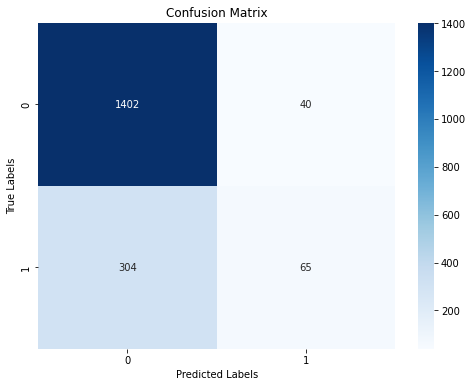

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# plot (?) confusion matrix as numpy array

cm = confusion_matrix(y_test, y_hat)
print ("confusion matrix is :", cm)

# plot

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 8) draw the tree

- here we can draw our tree

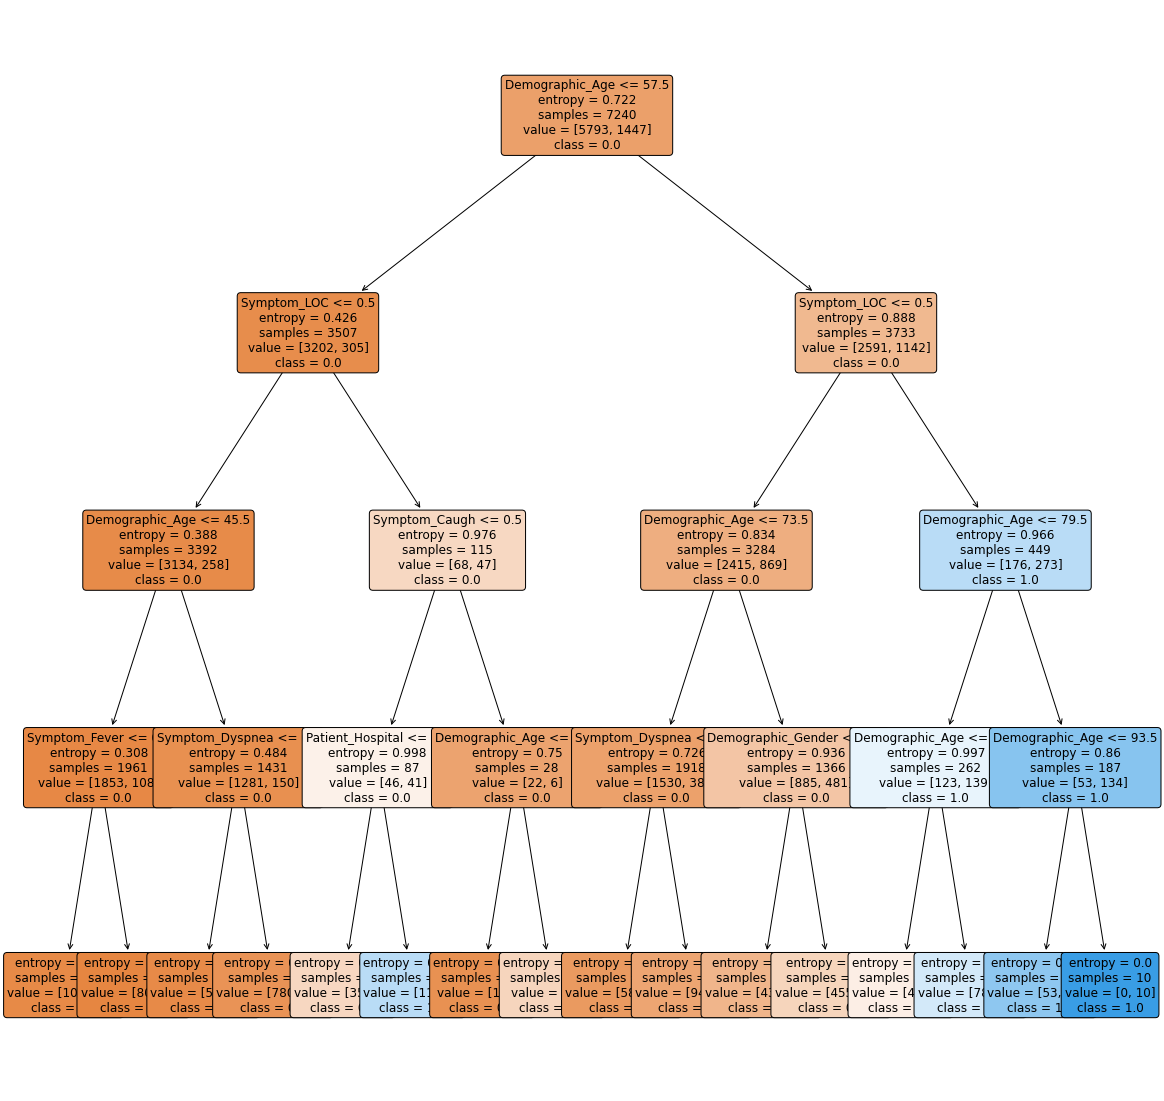

<Figure size 432x288 with 0 Axes>

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Set the figure size to adjust the plot

class_names = np.unique(y_train).astype(str)
featureNames = cdf.columns[0:7]

# Plot the decision tree with increased font size
plot_tree(mytree, feature_names=featureNames, class_names=class_names, filled=True, rounded=True
          , fontsize=12)

plt.show() 
plt.savefig("tree.jpg", format="jpg")